In [1]:
import warnings
from math import*
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
import time
import pickle
import random
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import scipy.io as scio
from scipy.stats import norm
import statsmodels.api as sm
from pylab import mpl

1. 利用複合梯形公式計算定積分

取 n = 2，4，8，16，32，64，128，256，512，精確值為 I = 4.006994，試比較誤差


In [2]:
def myfun_intergral_fun(x):
    f=np.sqrt(1+e**(x))
    return f

def myfun_intergral_trapezoid(a,b,n):
    x_0=a
    x_n=b
    h=(x_n-x_0)/n
    xp=np.arange(x_0,x_n+h,h)#插值节点
    fxp=myfun_intergral_fun(xp)
    fxp[0]=fxp[0]/2
    fxp[-1]=fxp[-1]/2#端点
    Tn=np.sum(fxp)*h
    return  Tn

a=0
b=2
I=4.006994
n=np.array([2, 4, 8, 16, 32, 64, 128, 256, 512])
all=np.zeros((len(n),4))#n行4列
all[:,0]=n
for i in range(len(n)):
    all[i,1]=myfun_intergral_trapezoid(0,2,n[i])#值
    all[i,2]=I-myfun_intergral_trapezoid(0,2,n[i])#误差
all[1:,3]=all[:-1,2]/all[1:,2]#误差比值 -->[-1]-->读取倒数第一个元素
print(all)

[[ 2.00000000e+00  4.08358483e+00 -7.65908325e-02  0.00000000e+00]
 [ 4.00000000e+00  4.02618740e+00 -1.91934040e-02  3.99047675e+00]
 [ 8.00000000e+00  4.01179540e+00 -4.80140051e-03  3.99745949e+00]
 [ 1.60000000e+01  4.00819470e+00 -1.20069826e-03  3.99884025e+00]
 [ 3.20000000e+01  4.00729435e+00 -3.00353306e-04  3.99761957e+00]
 [ 6.40000000e+01  4.00706926e+00 -7.52564741e-05  3.99106269e+00]
 [ 1.28000000e+02  4.00701298e+00 -1.89816037e-05  3.96470579e+00]
 [ 2.56000000e+02  4.00699891e+00 -4.91284472e-06  3.86366857e+00]
 [ 5.12000000e+02  4.00699540e+00 -1.39565238e-06  3.52010628e+00]]


2利用複合辛普森公式計算上題，其他條件都相同，試比較誤差。

In [3]:
def myfun_intergral_fun(x):
    f=np.sqrt(1+e**(x))
    return f

def mufun_integral_simpson(a,b,n):
    x_0=a
    x_n=b
    h=(x_n-x_0)/n
    xp=np.arange(x_0,x_n+h,h)#插值节点
    fxp=myfun_intergral_fun(xp)
    fxp[1:-1:2]=fxp[1:-1:2]*4
    fxp[2:-1:2]=fxp[2:-1:2]*2#端点
    Sn=np.sum(fxp)*h/3
    return  Sn

a=0
b=2
I=4.006994
n=np.array([2, 4, 8, 16, 32, 64, 128, 256, 512])
all=np.zeros((len(n),4))#n行4列
all[:,0]=n
for i in range(len(n)):
    all[i,1]=mufun_integral_simpson(0,2,n[i])#值
    all[i,2]=I-mufun_integral_simpson(0,2,n[i])#误差
all[1:,3]=all[:-1,2]/all[1:,2]#误差比值
print(all)

[[ 2.00000000e+00  4.00791301e+00 -9.19012031e-04  0.00000000e+00]
 [ 4.00000000e+00  4.00705493e+00 -6.09278574e-05  1.50836099e+01]
 [ 8.00000000e+00  4.00699807e+00 -4.06600175e-06  1.49847101e+01]
 [ 1.60000000e+01  4.00699446e+00 -4.64171373e-07  8.75969952e+00]
 [ 3.20000000e+01  4.00699424e+00 -2.38323582e-07  1.94765188e+00]
 [ 6.40000000e+01  4.00699422e+00 -2.24196691e-07  1.06301115e+00]
 [ 1.28000000e+02  4.00699422e+00 -2.23313583e-07  1.00395456e+00]
 [ 2.56000000e+02  4.00699422e+00 -2.23258385e-07  1.00024724e+00]
 [ 5.12000000e+02  4.00699422e+00 -2.23254935e-07  1.00001546e+00]]


3. 根據實證研究，回報率r在較大的時間尺度下，滿足正態分佈：

試從銳思數據庫下載滬深300指數在2000年1月11日至2019年6月30日每天的收盤價，並根據每天收盤計算週回報率序列。假設滬深300指數的周回報率滿足正態分佈，試估計正態分佈的參數，並用正態分佈函數表達式估計回報率在[-0.12,0.12]內的發生概率。


In [4]:
data=pd.read_excel("数据12-第三题.xls")
data.index=pd.to_datetime(data['交易日期_TrdDt'])
data['星期几']=data['交易日期_TrdDt'].dt.dayofweek
print(data)
xulie = []
for i in range(len(data)):
    if data['星期几'].iloc[i] == 0:
        if i+4<len(data):
            zhou = (data['收盘价()_ClPr'].iloc[i+4]-data['收盘价()_ClPr'].iloc[i])/data['收盘价()_ClPr'].iloc[i]
            xulie.append(zhou)
print(xulie)#周回报率序列
miu = np.mean(xulie)
sigma = np.std(xulie)
print('正态分布的μ和σ为',miu,sigma)
#
def p(r,miu,sigma):#满足
    fr = np.exp(-(r-miu)**2/(2*sigma**2))/sigma/((2*pi)**0.5)
    return fr
#
def mufun_integral_simpson(a,b,n):#概率
    x_0 = a
    x_n = b
    h = (x_n - x_0)/n
    xp = np.arange(x_0,x_n+h,h)
    fxp = p(xp,miu,sigma)
    fxp[1:-1:2] = fxp[1:-1:2]*4
    fxp[2:-1:2] = fxp[2:-1:2]*2
    Sn = np.sum(fxp)*h/3
    return Sn
#
pr = mufun_integral_simpson(-0.12,0.12,10000)
print(pr)

           交易日期_TrdDt  收盘价()_ClPr  星期几
交易日期_TrdDt                            
2002-01-04 2002-01-04     1316.45    4
2002-01-07 2002-01-07     1302.08    0
2002-01-08 2002-01-08     1292.71    1
2002-01-09 2002-01-09     1272.64    2
2002-01-10 2002-01-10     1281.26    3
...               ...         ...  ...
2019-06-24 2019-06-24     3841.27    0
2019-06-25 2019-06-25     3801.31    1
2019-06-26 2019-06-26     3794.33    2
2019-06-27 2019-06-27     3834.82    3
2019-06-28 2019-06-28     3825.59    4

[4241 rows x 3 columns]
[-0.04014346276726467, -0.046193419906235794, 0.0729021026330271, 0.09246612271305857, -0.0015198428417828316, -0.021823514877133042, 0.08506505494152683, -0.02784232847266595, 0.020858328799994042, -0.04336457855368858, 0.011096100426539655, 0.012738996775886637, -0.010367549718127466, 0.005162770686935432, -0.010623874824972714, -0.032262219561906585, 0.00567193346202434, -0.025001180786246198, 0.03224025251567912, -0.01738305433611536, 0.05215367656064989, 0.01

4. 已知 q 和 τ(q) 滿足如下關係：
q τ(q)
-3 -4.148699768
-2.5 -3.619030746
-2 -3.092016803
-1.5 -2.567837959
-1 -2.046695604
-0.5 -1.528835799
0 -1.014602958
0.5 - 0.504578958
1 -3.91E-16
1.50.495891384
2 0.973850479
2.5 1.413062546
3 1.795742153
3.5 2.13451612
4 2.452007908
4.5 2.760924181
5 3.066434887
另外，α和f(α)與q和τ(q)存在如下函數關係，

試利用向前差分、向後差分和中心差分分別計算出α和f(α)的值，並畫出對應的圖像。

C:\Users\hp\AppData\Local\Temp\ipykernel_25648\980222193.py:32: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(q[:-1], forward_diff, label='Forward Difference', use_line_collection=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_25648\980222193.py:41: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(q[1:-1], center_diff, label='Center Difference', use_line_collection=True)


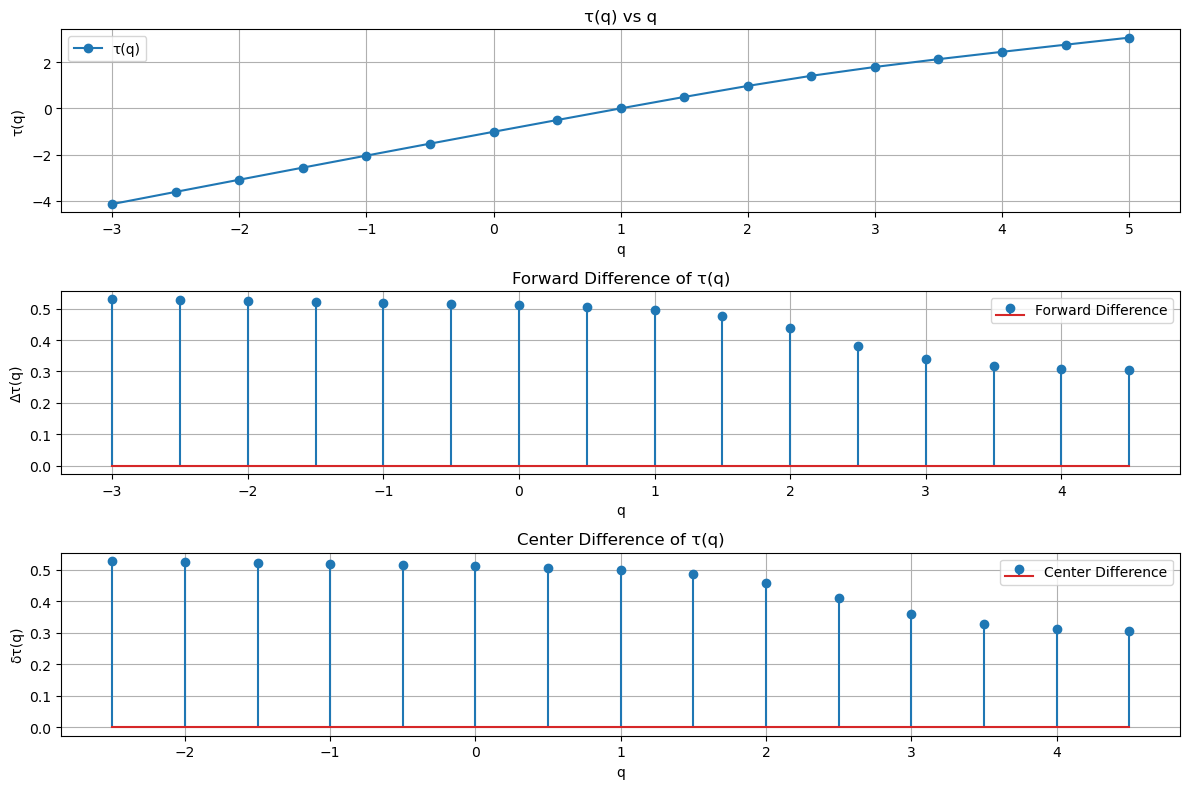

In [6]:
q = np.array([-3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
tau_q = np.array([-4.148699768, -3.619030746, -3.092016803, -2.567837959, 
                  -2.046695604, -1.528835799, -1.014602958, -0.504578958, 
                  -3.91E-16, 0.495891384, 0.973850479, 1.413062546, 
                  1.795742153, 2.13451612, 2.452007908, 2.760924181, 
                  3.066434887])

# 向前差分
forward_diff = np.diff(tau_q)

# 向后差分
backward_diff = np.diff(tau_q, prepend=tau_q[0])

# 中心差分
center_diff = (np.roll(tau_q, -1) - np.roll(tau_q, 1)) / 2
center_diff = center_diff[1:-1]  # 去掉边缘的无效值

# 图形绘制
plt.figure(figsize=(12, 8))

# 原始数据
plt.subplot(3, 1, 1)
plt.plot(q, tau_q, 'o-', label='τ(q)')
plt.title('τ(q) vs q')
plt.xlabel('q')
plt.ylabel('τ(q)')
plt.grid()
plt.legend()

# 向前差分
plt.subplot(3, 1, 2)
plt.stem(q[:-1], forward_diff, label='Forward Difference', use_line_collection=True)
plt.title('Forward Difference of τ(q)')
plt.xlabel('q')
plt.ylabel('Δτ(q)')
plt.grid()
plt.legend()

# 中心差分
plt.subplot(3, 1, 3)
plt.stem(q[1:-1], center_diff, label='Center Difference', use_line_collection=True)
plt.title('Center Difference of τ(q)')
plt.xlabel('q')
plt.ylabel('δτ(q)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


5.市場中股票價格的變化過程可以用一種隨機過程——幾何布朗運動來近似：

其中，μ是漂移率，指單位時間內變數均值的變化值，表示在短時間內股票年化比例收益率的期望值，不是年化連續複利收益率的期望值，單位為年；σ是方差率，指變量單位時間內的方差，表示股票連續複利收益率的年化標準差，單位年1/2；dw遵循標準布朗運動。
標準布朗運動：設dt代表一個小的時間間隔長度，dw代表變數w在dt時間內的變化，如果w遵循標準布朗運動，則有：

確定一隻股票（股票代碼後三位和學號後三位一致），從銳思數據庫下載數據，數據覆蓋範圍為最近10年，並利用股票數據估計幾何布朗運動中的模型參數。 結合向前差分、向後差分和中心差分，寫出股票價格的模擬方程，模擬一年的價格走勢，畫出圖像。      


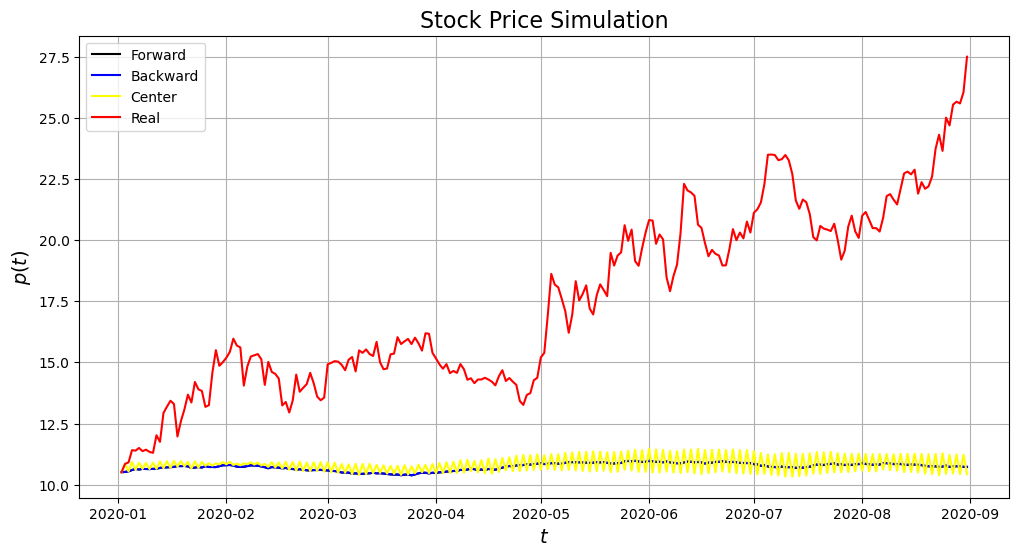

In [8]:
# 读取数据
data = pd.read_excel('12数据-5.xls')
data1 = pd.DataFrame(data)
data1['更新时间_UpDt'] = pd.to_datetime(data1['更新时间_UpDt'])
data1.set_index('更新时间_UpDt', inplace=True)

# 计算连续收益率
returns = (data1['000547收盘价(元)_ClPr'].pct_change()).dropna()
mu = np.mean(returns)
sigma = np.std(returns)

# 模拟参数
N = 243  # 每年的交易日
T = 1    # 模拟时间1年
delta_t = T / N

# 实际价格数据
real_prices = data1['000547收盘价(元)_ClPr'].values
p0 = real_prices[-N]  # 取最近的N个数据
p_1 = real_prices[-N+1]

# 模拟几何布朗运动
np.random.seed(0)  # 为了可重复性
W = np.random.normal(0, 1, N)
forward = [p0]
backward = [p0]
center = [p0, p_1]

for m in range(1, N):
    forward.append(forward[m-1] * (1 + mu * delta_t + sigma * W[m] * np.sqrt(delta_t)))
    backward.append(backward[m-1] / (1 - mu * delta_t - sigma * W[m] * np.sqrt(delta_t)))
    if m > 1:
        center.append(center[m-1] * (2 * mu * delta_t + sigma * W[m] * np.sqrt(2 * delta_t)) + center[m-2])

# 结果组合
fdata = pd.DataFrame({
    'forward': forward,
    'backward': backward,
    'center': center,
    'real': real_prices[-N:]
}, index=pd.date_range(start=data1.index[-N], periods=N))

# 计算误差
fdata['forward_error'] = fdata['real'] - fdata['forward']
fdata['backward_error'] = fdata['real'] - fdata['backward']
fdata['center_error'] = fdata['real'] - fdata['center']

# 绘图
plt.figure(figsize=(12, 6))
plt.plot(fdata.index, fdata['forward'], label='Forward', color='black')
plt.plot(fdata.index, fdata['backward'], label='Backward', color='blue')
plt.plot(fdata.index, fdata['center'], label='Center', color='yellow')
plt.plot(fdata.index, fdata['real'], label='Real', color='red')
plt.xlabel(r'$t$', fontsize=14)
plt.ylabel(r'$p(t)$', fontsize=14)
plt.title('Stock Price Simulation', fontsize=16)
plt.legend()
plt.grid()
plt.show()